# H2 vs EnMap 23 April 2025

## Imports

In [ ]:
from hypso import Hypso1, Hypso2
import os 
import sys
import matplotlib.pyplot as plt
from global_land_mask import globe 
import numpy as np 
import pandas as pd

funksjoner_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'funksjoner'))
if funksjoner_path not in sys.path:
    sys.path.append(funksjoner_path)

import universal_funkjsoner as uf

import xarray as xr
import re
import math
import importlib

from sklearn.cluster import KMeans
from collections import defaultdict

from sklearn.preprocessing import StandardScaler

np.random.seed(42)

dir_path = "../data/" ## filene hentes fra en mappe over der vi er nå

hei fra utformet bedre :)


In [ ]:

importlib.reload(uf)

hei fra utformet bedre :)


<module 'universal_funkjsoner' from '/home/itk/Documents/AnneMarthe/Master/Hypso_H1_H2/funksjoner/universal_funkjsoner.py'>

## Data uploading 

In [4]:
## H2
i_250423_10 = os.path.join(dir_path, "image64N9E_2025-04-23T10-28-01Z-l1a.nc")
i_250423_10_b = os.path.join(dir_path, "image64N9E_2025-04-23T10-28-01Z-l1b.nc")
i_250423_10_c = os.path.join(dir_path, "image64N9E_2025-04-23T10-28-01Z-l1c.nc")
i_250423_10_d = os.path.join(dir_path, "image64N9E_2025-04-23T10-28-01Z-l1d.nc")

satobj_h2_250423_10 = Hypso2( path = i_250423_10, verbose = True )

l1a_cube_250423_10 = satobj_h2_250423_10.l1a_cube
l1b_cube_250423_10 = Hypso2( path = i_250423_10_b, verbose = True )
l1c_cube_250423_10 = Hypso2( path = i_250423_10_c, verbose = True )
l1d_cube_250423_10 = Hypso2( path = i_250423_10_d, verbose = True )

l1c_cube_250423_10 = l1c_cube_250423_10.l1c_cube
l1b_cube_250423_10 = l1b_cube_250423_10.l1b_cube
l1d_cube_250423_10 = l1d_cube_250423_10.l1d_cube

satobj_h2_250423_10.run_direct_georeferencing() # in order to get the longiyudes and latitudes 

[INFO] Loading L1a capture image64N9E_2025-04-23T10-28-01Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1b capture image64N9E_2025-04-23T10-28-01Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1c capture image64N9E_2025-04-23T10-28-01Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1d capture image64N9E_2025-04-23T10-28-01Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 539
[INFO] ADCS time range: 1745403420.000000 to 1745404350.000000
[INFO] Frame time range: 1745404081.613977 to 1745404156.238977
[INFO] 298 sample(s) inside frame time range
[INFO] Interpolating 598 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometry

In [5]:
## H2
i_250423_12 = os.path.join(dir_path, "image64N9E_2025-04-23T12-03-20Z-l1a.nc")
i_250423_12_b = os.path.join(dir_path, "image64N9E_2025-04-23T12-03-20Z-l1b.nc")
i_250423_12_c = os.path.join(dir_path, "image64N9E_2025-04-23T12-03-20Z-l1c.nc")
i_250423_12_d = os.path.join(dir_path, "image64N9E_2025-04-23T12-03-20Z-l1d.nc")

satobj_h2_250423_12 = Hypso2( path = i_250423_12, verbose = True )

l1a_cube_250423_12 = satobj_h2_250423_10.l1a_cube
l1b_cube_250423_12 = Hypso2( path = i_250423_12_b, verbose = True )
l1c_cube_250423_12 = Hypso2( path = i_250423_12_c, verbose = True )
l1d_cube_250423_12 = Hypso2( path = i_250423_12_d, verbose = True )

l1c_cube_250423_12 = l1c_cube_250423_12.l1c_cube
l1b_cube_250423_12 = l1b_cube_250423_12.l1b_cube
l1d_cube_250423_12 = l1d_cube_250423_12.l1d_cube

satobj_h2_250423_12.run_direct_georeferencing() # in order to get the longiyudes and latitudes 

[INFO] Loading L1a capture image64N9E_2025-04-23T12-03-20Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1b capture image64N9E_2025-04-23T12-03-20Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1c capture image64N9E_2025-04-23T12-03-20Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1d capture image64N9E_2025-04-23T12-03-20Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 540
[INFO] ADCS time range: 1745409150.000000 to 1745410080.000000
[INFO] Frame time range: 1745409801.005251 to 1745409875.630251
[INFO] 298 sample(s) inside frame time range
[INFO] Interpolating 598 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometry

In [6]:
path_cla_atm_250423_10 = os.path.join(dir_path, "image64N9E_2025-04-23T10-28-01Z-l1c.nc.polymer.nc")######
cla_atm_250423_10 = xr.open_dataset(path_cla_atm_250423_10)

latitude_250423_10 = np.array(cla_atm_250423_10['latitude'])
longitude_250423_10 = np.array(cla_atm_250423_10['longitude'])

In [7]:
path_cla_atm_250423_12 = os.path.join(dir_path, "image64N9E_2025-04-23T12-03-20Z-l1c.nc.polymer.nc")######
cla_atm_250423_12 = xr.open_dataset(path_cla_atm_250423_12)

latitude_250423_12 = np.array(cla_atm_250423_12['latitude'])
longitude_250423_12 = np.array(cla_atm_250423_12['longitude'])

In [8]:
rho_vars = [var for var in cla_atm_250423_10.variables if re.match(r'rho_w_\d+', var)]
rho_vars_sorted = sorted(rho_vars, key=lambda v: int(v.split('_')[-1])) #A variable containing the name of all the rho vaibles
rho_vars_sorted = rho_vars_sorted[5:]
print("Sorted rho variables:", rho_vars_sorted)
print(len(rho_vars_sorted))

Sorted rho variables: ['rho_w_418', 'rho_w_422', 'rho_w_425', 'rho_w_429', 'rho_w_432', 'rho_w_436', 'rho_w_439', 'rho_w_443', 'rho_w_446', 'rho_w_450', 'rho_w_453', 'rho_w_457', 'rho_w_460', 'rho_w_464', 'rho_w_467', 'rho_w_471', 'rho_w_474', 'rho_w_478', 'rho_w_481', 'rho_w_485', 'rho_w_488', 'rho_w_492', 'rho_w_495', 'rho_w_499', 'rho_w_502', 'rho_w_506', 'rho_w_509', 'rho_w_513', 'rho_w_516', 'rho_w_520', 'rho_w_523', 'rho_w_526', 'rho_w_530', 'rho_w_533', 'rho_w_537', 'rho_w_540', 'rho_w_544', 'rho_w_547', 'rho_w_551', 'rho_w_554', 'rho_w_558', 'rho_w_561', 'rho_w_565', 'rho_w_568', 'rho_w_572', 'rho_w_575', 'rho_w_579', 'rho_w_582', 'rho_w_585', 'rho_w_589', 'rho_w_592', 'rho_w_596', 'rho_w_599', 'rho_w_603', 'rho_w_606', 'rho_w_610', 'rho_w_613', 'rho_w_617', 'rho_w_620', 'rho_w_623', 'rho_w_627', 'rho_w_630', 'rho_w_634', 'rho_w_637', 'rho_w_641', 'rho_w_644', 'rho_w_648', 'rho_w_651', 'rho_w_654', 'rho_w_658', 'rho_w_661', 'rho_w_665', 'rho_w_668', 'rho_w_672', 'rho_w_675', 'r

## Target lat long

In [ ]:
#wl = satobj_h1_25_0511.wavelengths[9:118]
x_123 = [387.84749685, 391.40406599, 394.95941579, 398.51354623, 402.06645732, 405.61814905, 409.16862143, 412.71787446, 416.26590814, 419.81272246, 423.35831743, 426.90269305, 430.44584931, 433.98778622, 437.52850378, 441.06800198, 444.60628083, 448.14334033, 451.67918047, 455.21380126, 458.7472027, 462.27938479, 465.81034752, 469.3400909 , 472.86861492,476.3959196 , 479.92200491, 483.44687088, 486.97051749, 490.49294475,494.01415266, 497.53414122, 501.05291042, 504.57046026, 508.08679076,511.6019019 , 515.11579369, 518.62846612, 522.13991921, 525.65015294,529.15916731, 532.66696233, 536.173538  , 539.67889432, 543.18303128,546.68594889, 550.18764715, 553.68812606, 557.18738561, 560.68542581,564.18224665, 567.67784814, 571.17223028, 574.66539307, 578.1573365, 581.64806058, 585.1375653 , 588.62585068, 592.1129167 , 595.59876336,599.08339068, 602.56679864, 606.04898725, 609.5299565 , 613.0097064 ,616.48823695, 619.96554815, 623.44163999, 626.91651248, 630.39016561,633.86259939, 637.33381382, 640.8038089 , 644.27258462, 647.74014099,651.20647801, 654.67159568, 658.13549399, 661.59817294, 665.05963255,668.5198728 , 671.9788937 , 675.43669524, 678.89327744, 682.34864028,685.80278376, 689.25570789, 692.70741267, 696.1578981 , 699.60716418,703.0552109 , 706.50203826, 709.94764628, 713.39203494, 716.83520425,720.2771542 , 723.7178848 , 727.15739605, 730.59568795, 734.03276049,737.46861368, 740.90324752, 744.336662  , 747.76885713, 751.19983291,754.62958933, 758.0581264 , 761.48544412, 764.91154248, 768.33642149,771.76008115, 775.18252146, 778.60374241, 782.02374401, 785.44252625,788.86008915, 792.27643269, 795.69155687, 799.10546171, 802.51814719]
wl = x_123[9:118]

#target_lat_6 = [64.20992561747796,64.48557437461893,64.52896641587218,  64.22009411667561] 
#target_lon_6 = [9.704720121565003,9.886201113342556, 8.708294855080245,8.73032214102829]  

#target_lat_5 = [63.896904083590066,64.17324887890479,64.11631446557637,  63.887923483169004] 
#target_lon_5 = [9.578289180688513,9.582148298814932,8.924448409066027,  8.96230357578283]
target_lat_6 = [64.152913,64.254748,64.280744,  64.145967]
target_lon_6 = [9.500527 ,9.579630 , 9.258824 ,  9.242894 -0.25]  

target_lat_5 = [63.856648, 63.959085, 63.949196,  63.853017]
target_lon_5 = [9.500427, 9.415833, 9.148865,  9.154358]

target_lat_3 = [63.65192496143867,63.818490304354434,63.793837321385155,  63.660555970548074] #område 2.1.
target_lon_3 = [9.526455044589706,9.531415429238418, 9.442656298818237,9.439764451470932]

target_lat_2 = [63.47865598622861,63.646767083517425,63.61771951990031,  63.42721372576498] #område 5.1
target_lon_2 = [10.061035990832918,9.804697410334523, 9.723689711502818,9.982929114384596]  

target_lat_1 = [63.44802428401152,63.52676744792975, 63.55113867486421,  63.46332195091103] #område 8 
target_lon_1 = [10.706024496195505,10.726421572030368, 10.227932960954064,  10.211631333282082] 

calibration_lat = [63.642540,63.642540, 63.642540,  63.642540] ##
calibration_long = [9.503311,9.503311, 9.503311,  9.503311]

## RRS H2 AC kl 10

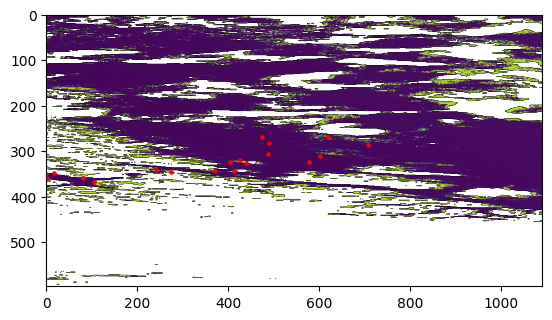

In [10]:
RRS_AC_H2_250511_A1_10 = uf.automated_RRS_H2_AC(satobj_h2_250423_10, l1d_cube_250423_10, cla_atm_250423_10, rho_vars_sorted, target_lat_1, target_lon_1, latitude_250423_10, longitude_250423_10)
RRS_AC_H2_250511_A2_10 = uf.automated_RRS_H2_AC(satobj_h2_250423_10, l1d_cube_250423_10, cla_atm_250423_10, rho_vars_sorted, target_lat_2, target_lon_2, latitude_250423_10, longitude_250423_10)
RRS_AC_H2_250511_A3_10 = uf.automated_RRS_H2_AC(satobj_h2_250423_10, l1d_cube_250423_10, cla_atm_250423_10, rho_vars_sorted, target_lat_3, target_lon_3, latitude_250423_10, longitude_250423_10)
RRS_AC_H2_250511_A5_10 = uf.automated_RRS_H2_AC(satobj_h2_250423_10, l1d_cube_250423_10, cla_atm_250423_10, rho_vars_sorted, target_lat_5, target_lon_5, latitude_250423_10, longitude_250423_10)
RRS_AC_H2_250511_A6_10 = uf.automated_RRS_H2_AC(satobj_h2_250423_10, l1d_cube_250423_10, cla_atm_250423_10, rho_vars_sorted, target_lat_6, target_lon_6, latitude_250423_10, longitude_250423_10)

In [11]:
RRS_median_H2_AC_A1_10 = np.median(RRS_AC_H2_250511_A1_10, axis=0)
RRS_median_H2_AC_A2_10 = np.median(RRS_AC_H2_250511_A2_10, axis=0)
RRS_median_H2_AC_A3_10 = np.median(RRS_AC_H2_250511_A3_10, axis=0)
RRS_median_H2_AC_A5_10 = np.median(RRS_AC_H2_250511_A5_10, axis=0)
RRS_median_H2_AC_A6_10 = np.median(RRS_AC_H2_250511_A6_10, axis=0)

print(RRS_median_H2_AC_A1_10.shape)


(109,)


## RRS H2 Ac kl 12

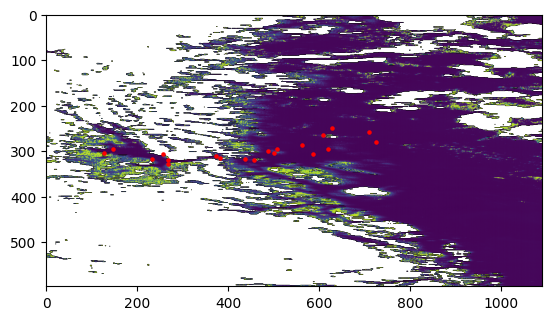

In [12]:
RRS_AC_H2_250511_A1_12 = uf.automated_RRS_H2_AC(satobj_h2_250423_12, l1d_cube_250423_12, cla_atm_250423_12, rho_vars_sorted, target_lat_1, target_lon_1, latitude_250423_12, longitude_250423_12)
RRS_AC_H2_250511_A2_12 = uf.automated_RRS_H2_AC(satobj_h2_250423_12, l1d_cube_250423_12, cla_atm_250423_12, rho_vars_sorted, target_lat_2, target_lon_2, latitude_250423_12, longitude_250423_12)
RRS_AC_H2_250511_A3_12 = uf.automated_RRS_H2_AC(satobj_h2_250423_12, l1d_cube_250423_12, cla_atm_250423_12, rho_vars_sorted, target_lat_3, target_lon_3, latitude_250423_12, longitude_250423_12)
RRS_AC_H2_250511_A5_12 = uf.automated_RRS_H2_AC(satobj_h2_250423_12, l1d_cube_250423_12, cla_atm_250423_12, rho_vars_sorted, target_lat_5, target_lon_5, latitude_250423_12, longitude_250423_12)
RRS_AC_H2_250511_A6_12 = uf.automated_RRS_H2_AC(satobj_h2_250423_12, l1d_cube_250423_12, cla_atm_250423_12, rho_vars_sorted, target_lat_6, target_lon_6, latitude_250423_12, longitude_250423_12)

In [13]:
RRS_median_H2_AC_A1_12 = np.median(RRS_AC_H2_250511_A1_12, axis=0)
RRS_median_H2_AC_A2_12 = np.median(RRS_AC_H2_250511_A2_12, axis=0)
RRS_median_H2_AC_A3_12 = np.median(RRS_AC_H2_250511_A3_12, axis=0)
RRS_median_H2_AC_A5_12 = np.median(RRS_AC_H2_250511_A5_12, axis=0)
RRS_median_H2_AC_A6_12 = np.median(RRS_AC_H2_250511_A6_12, axis=0)

print(RRS_median_H2_AC_A1_12.shape)
print(RRS_AC_H2_250511_A1_12.shape)

(109,)
(1265, 109)


## variasjon

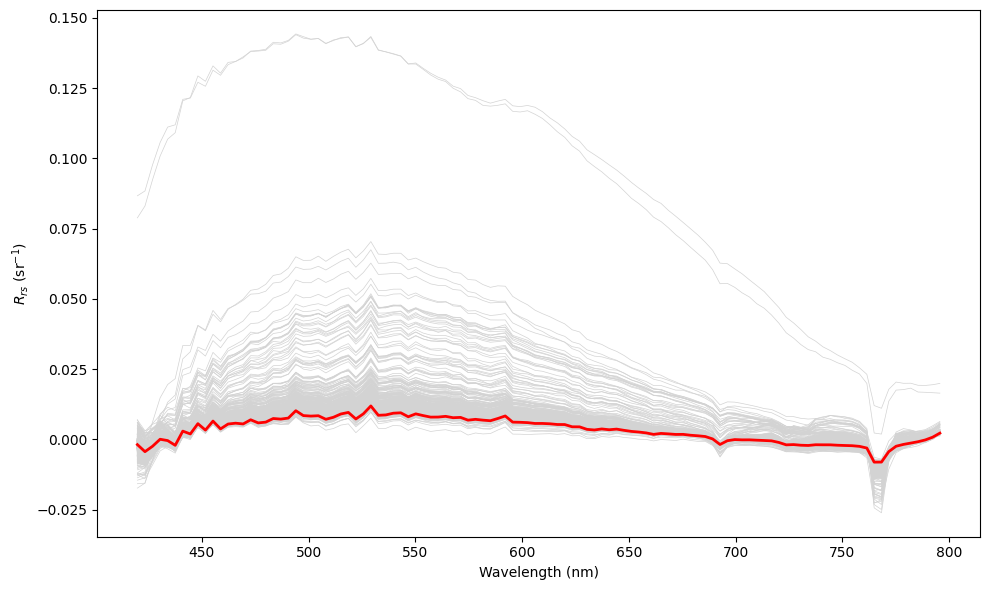

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# rrs: shape (1265, 109)
# wavelength: shape (109,)

# Calculate the median spectrum
median_rrs = RRS_median_H2_AC_A1_12

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each individual spectrum in light grey
for i in range(RRS_AC_H2_250511_A1_12.shape[0]):
    plt.plot(wl, RRS_AC_H2_250511_A1_12[i], color='lightgray', linewidth=0.5)

# Plot the median spectrum in red
plt.plot(wl, median_rrs, color='red', linewidth=2)

# Axis labels
plt.xlabel("Wavelength (nm)")
plt.ylabel(r"$R_{rs}$ (sr$^{-1}$)")

plt.tight_layout()
plt.show()


## Ecolight -s 

/tmp/ipykernel_1895606/1075601835.py:25: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  datasetb = pd.read_csv(dataset_pathb, index_col=False)


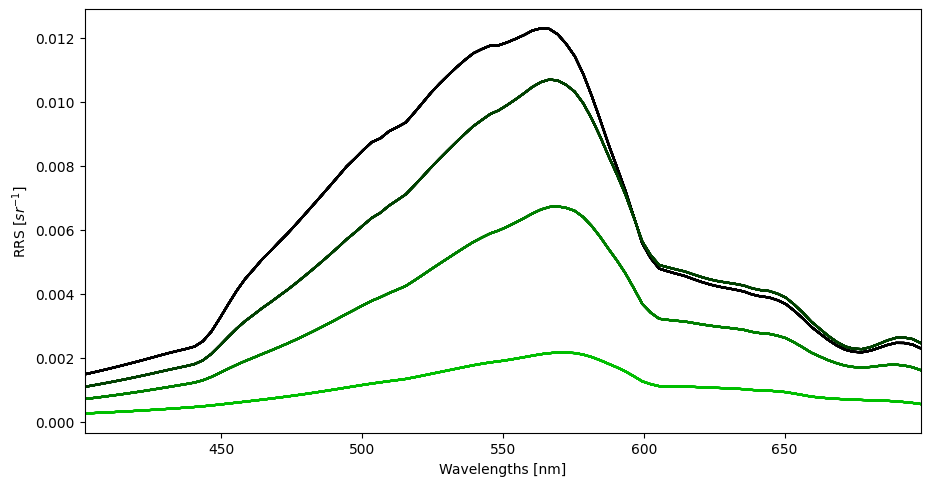

In [ ]:
# Function to plot spectral data
def plot_spectral_data(x, wl, picture_id):
    for i in range(x.shape[0]):
        #print(x.shape)
        #print(x[picture_id,:])
        plt.plot(wl, x[picture_id, :], linestyle='-', color=colors2[picture_id])
    plt.xlabel("Wavelengths [nm]")
    plt.ylabel("RRS [$sr^{-1}$]")
    plt.xlim(401.5, 698.5)


#Number of datapoints
data = pd.read_csv('../../ecolight-s/data/inputs_2025.csv')
ni = len(data['sun_angle']) #number of rows in data file
# Number of colors
num_colors = ni
# Generate a sequence of colors
colors2 = [(0, i / num_colors, 0) for i in range(ni)] 

#for idx in range (10,11):
    # Load the dataset
dataset_path = "../../ecolight-s/output/rrs_output2025/rrsalltest" + "19" +".txt" 
dataset_pathb = "../../ecolight-s/output/rrs_output2025/rrsalltestB" + "19" +".txt"
dataset = pd.read_csv(dataset_path, index_col=False)
datasetb = pd.read_csv(dataset_pathb, index_col=False)
# Read data from the dataset
xa = dataset.values[:, 0:-1]
xb = datasetb.values[:, 0:-3]
x_ecolight_normal = np.concatenate((xa, xb), axis=1)
wl_e = np.arange(401.5, 701.5, 3)



for i in range(0,20,5): ## Kun endre denne linjen for å endre plottet
    plot_spectral_data(x_ecolight_normal, wl_e, i)  ##mørkeste verdi er laveste i, lyseste plot er høyeste i

#plot_spectral_data(x, wl, 0) ## Mørkeste
#plot_spectral_data(x, wl, 5)
#plot_spectral_data(x, wl, 10)
#plot_spectral_data(x, wl, 15)
#plot_spectral_data(x, wl, 20)
#plot_spectral_data(x, wl, 25)
#plot_spectral_data(x, wl, 30)
#plot_spectral_data(x, wl, 35)
#plot_spectral_data(x, wl, 40)
#plot_spectral_data(x, wl, 45) ## lyseste 

plt.tight_layout()
plt.gcf().set_size_inches(10, 5)
plt.savefig('rrs_spectra_3nm_am_profile_2023.png', dpi=300, bbox_inches='tight')
plt.show()

### Ecolight with changing water profile, profile

/tmp/ipykernel_1895606/1670799527.py:25: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  datasetb = pd.read_csv(dataset_pathb, index_col=False)


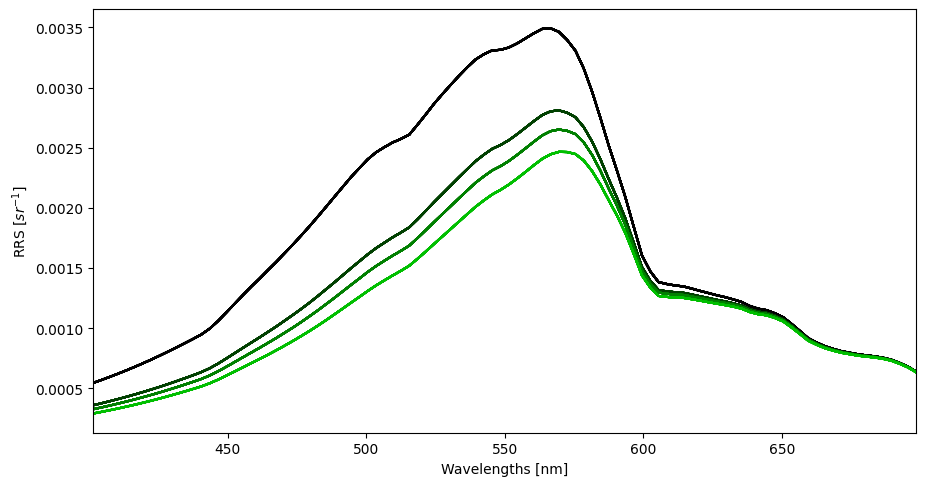

In [ ]:
# Function to plot spectral data
def plot_spectral_data(x, wl, picture_id):
    for i in range(x.shape[0]):
        #print(x.shape)
        #print(x[picture_id,:])
        plt.plot(wl, x[picture_id, :], linestyle='-', color=colors2[picture_id])
    plt.xlabel("Wavelengths [nm]")
    plt.ylabel("RRS [$sr^{-1}$]")
    plt.xlim(401.5, 698.5)


#Number of datapoints
data = pd.read_csv('../../ecolight-s/data/inputs_2025.csv')
ni = len(data['sun_angle']) #number of rows in data file

num_colors = ni
colors2 = [(0, i / num_colors, 0) for i in range(ni)] 

#for idx in range (10,11):
    # Load the dataset
dataset_path = "../../ecolight-s/output/rrs_output_profile2025/rrsalltest" + "19" +".txt" 
dataset_pathb = "../../ecolight-s/output/rrs_output_profile2025/rrsalltestB" + "19" +".txt"
dataset = pd.read_csv(dataset_path, index_col=False)
datasetb = pd.read_csv(dataset_pathb, index_col=False)

xa = dataset.values[:, 0:-1]
xb = datasetb.values[:, 0:-3]
x_ecolight_profile = np.concatenate((xa, xb), axis=1)
wl_e = np.arange(401.5, 701.5, 3)


for i in range(0,20,5): ## Kun endre denne linjen for å endre plottet
    plot_spectral_data(x_ecolight_profile, wl_e, i)  ##mørkeste verdi er laveste i, lyseste plot er høyeste i

#plot_spectral_data(x, wl, 0) ## Mørkeste
#plot_spectral_data(x, wl, 5)
#plot_spectral_data(x, wl, 10)
#plot_spectral_data(x, wl, 15)
#plot_spectral_data(x, wl, 20)
#plot_spectral_data(x, wl, 25)
#plot_spectral_data(x, wl, 30)
#plot_spectral_data(x, wl, 35)
#plot_spectral_data(x, wl, 40)
#plot_spectral_data(x, wl, 45) ## lyseste 

plt.tight_layout()
plt.gcf().set_size_inches(10, 5)
plt.savefig('rrs_spectra_3nm_am_profile_2023.png', dpi=300, bbox_inches='tight')
plt.show()

### Ecolight -s B, variation in profile, Max values higher up

/tmp/ipykernel_1895606/4098015038.py:25: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  datasetb = pd.read_csv(dataset_pathb, index_col=False)


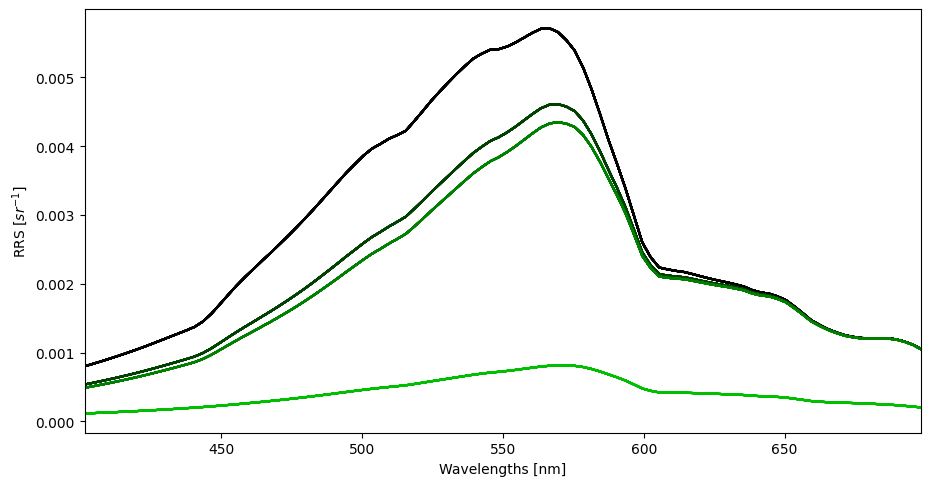

In [ ]:
# Function to plot spectral data
def plot_spectral_data(x, wl, picture_id):
    for i in range(x.shape[0]):
        #print(x.shape)
        #print(x[picture_id,:])
        plt.plot(wl, x[picture_id, :], linestyle='-', color=colors2[picture_id])
    plt.xlabel("Wavelengths [nm]")
    plt.ylabel("RRS [$sr^{-1}$]")
    plt.xlim(401.5, 698.5)


#Number of datapoints
data = pd.read_csv('../../ecolight-s/data/inputs_2025.csv')
ni = len(data['sun_angle']) #number of rows in data file

num_colors = ni
colors2 = [(0, i / num_colors, 0) for i in range(ni)] 

#for idx in range (10,11):
    # Load the dataset
dataset_path = "../../ecolight-s/output/rrs_output_profileb2025/rrsalltest" + "19" +".txt" 
dataset_pathb = "../../ecolight-s/output/rrs_output_profileb2025/rrsalltestB" + "19" +".txt"
dataset = pd.read_csv(dataset_path, index_col=False)
datasetb = pd.read_csv(dataset_pathb, index_col=False)
# Read data from the dataset
xa = dataset.values[:, 0:-1]
xb = datasetb.values[:, 0:-3]
x_ecolight_profile_b = np.concatenate((xa, xb), axis=1)
wl_e = np.arange(401.5, 701.5, 3)



for i in range(0,20,5): ## Kun endre denne linjen for å endre plottet
    plot_spectral_data(x_ecolight_profile_b, wl_e, i)  ##mørkeste verdi er laveste i, lyseste plot er høyeste i

#plot_spectral_data(x, wl, 0) ## Mørkeste
#plot_spectral_data(x, wl, 5)
#plot_spectral_data(x, wl, 10)
#plot_spectral_data(x, wl, 15)
#plot_spectral_data(x, wl, 20)
#plot_spectral_data(x, wl, 25)
#plot_spectral_data(x, wl, 30)
#plot_spectral_data(x, wl, 35)
#plot_spectral_data(x, wl, 40)
#plot_spectral_data(x, wl, 45) ## lyseste 

plt.tight_layout()
plt.gcf().set_size_inches(10, 5)
plt.savefig('rrs_spectra_3nm_am_profile_2023.png', dpi=300, bbox_inches='tight')
plt.show()

### Ecolight-S C, variation between phutoplanton

/tmp/ipykernel_1895606/3281074091.py:25: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  datasetb = pd.read_csv(dataset_pathb, index_col=False)


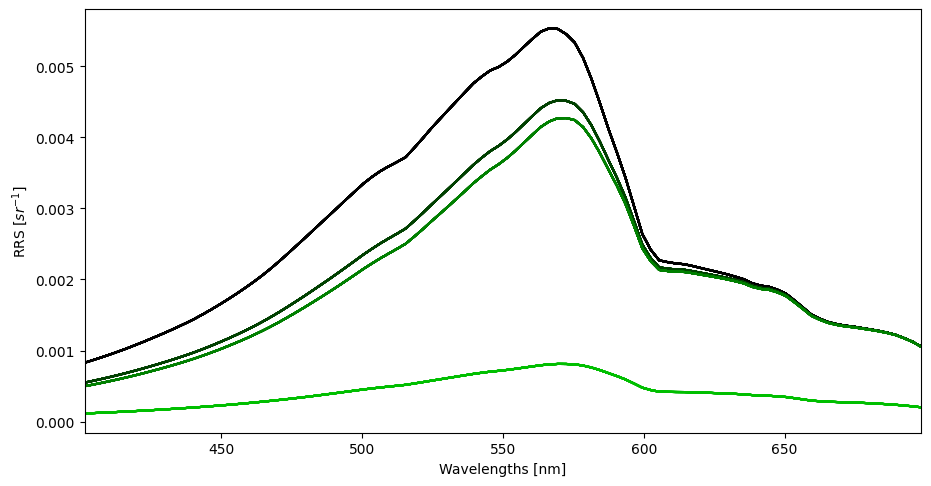

In [ ]:
# Function to plot spectral data
def plot_spectral_data(x, wl, picture_id):
    for i in range(x.shape[0]):
        #print(x.shape)
        #print(x[picture_id,:])
        plt.plot(wl, x[picture_id, :], linestyle='-', color=colors2[picture_id])
    plt.xlabel("Wavelengths [nm]")
    plt.ylabel("RRS [$sr^{-1}$]")
    plt.xlim(401.5, 698.5)


#Number of datapoints
data = pd.read_csv('../../ecolight-s/data/inputs_2025.csv')
ni = len(data['sun_angle']) #number of rows in data file
num_colors = ni
colors2 = [(0, i / num_colors, 0) for i in range(ni)] 

#for idx in range (10,11):
    # Load the dataset
dataset_path = "../../ecolight-s/output/rrs_output_profilec2025/rrsalltest" + "19" +".txt" 
dataset_pathb = "../../ecolight-s/output/rrs_output_profilec2025/rrsalltestB" + "19" +".txt"
dataset = pd.read_csv(dataset_path, index_col=False)
datasetb = pd.read_csv(dataset_pathb, index_col=False)
# Read data from the dataset
xa = dataset.values[:, 0:-1]
xb = datasetb.values[:, 0:-3]
x_ecolight_profile_c = np.concatenate((xa, xb), axis=1)
wl_e = np.arange(401.5, 701.5, 3)


for i in range(0,20,5): ## Kun endre denne linjen for å endre plottet
    plot_spectral_data(x_ecolight_profile_c, wl_e, i)  ##mørkeste verdi er laveste i, lyseste plot er høyeste i

#plot_spectral_data(x, wl, 0) ## Mørkeste
#plot_spectral_data(x, wl, 5)
#plot_spectral_data(x, wl, 10)
#plot_spectral_data(x, wl, 15)
#plot_spectral_data(x, wl, 20)
#plot_spectral_data(x, wl, 25)
#plot_spectral_data(x, wl, 30)
#plot_spectral_data(x, wl, 35)
#plot_spectral_data(x, wl, 40)
#plot_spectral_data(x, wl, 45) ## lyseste 

plt.tight_layout()
plt.gcf().set_size_inches(10, 5)
plt.savefig('rrs_spectra_3nm_am_profile_2023.png', dpi=300, bbox_inches='tight')
plt.show()

## optimalisering Ecolight-s og H2 kl 12

In [20]:
from scipy.interpolate import interp1d
import numpy as np

# Create interpolation function
interp_func = interp1d(wl_e, x_ecolight_profile[5], kind='linear', bounds_error=False, fill_value='extrapolate')

# Interpolate test_RRS to match the wl grid
test_RRS_interp = interp_func(wl)


In [21]:
# Compute Euclidean distances
distances = np.linalg.norm(RRS_AC_H2_250511_A1_12 - test_RRS_interp, axis=1)

# Find index of the closest match
closest_index = np.argmin(distances)
closest_spectrum = RRS_AC_H2_250511_A1_12[closest_index]

print(f"Closest spectrum index: {closest_index}")


Closest spectrum index: 17


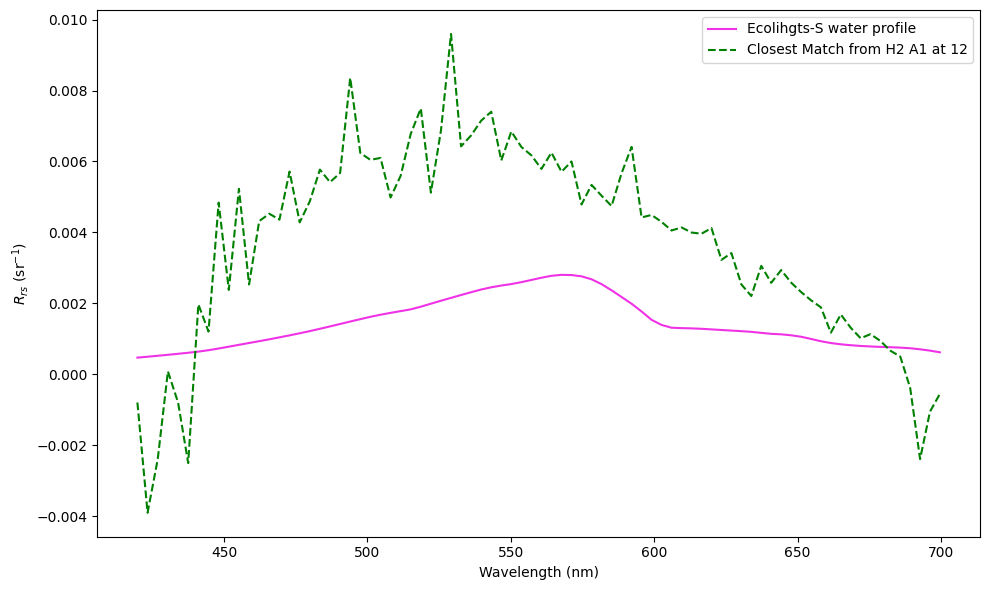

In [ ]:

wl = np.array(wl)

mask = (np.array(wl) >= 419) & (np.array(wl) <= 700)


wl_plot = wl[mask]
test_plot = test_RRS_interp[mask]
closest_plot = closest_spectrum[mask]

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(wl_plot, test_plot, label='Ecolihgts-S water profile', color='#f032e6')
plt.plot(wl_plot, closest_plot, label='Closest Match from H2 A1 at 12', color='green', linestyle='--')

plt.xlabel("Wavelength (nm)")
plt.ylabel(r"$R_{rs}$ (sr$^{-1}$)")
plt.legend()
plt.tight_layout()
plt.show()


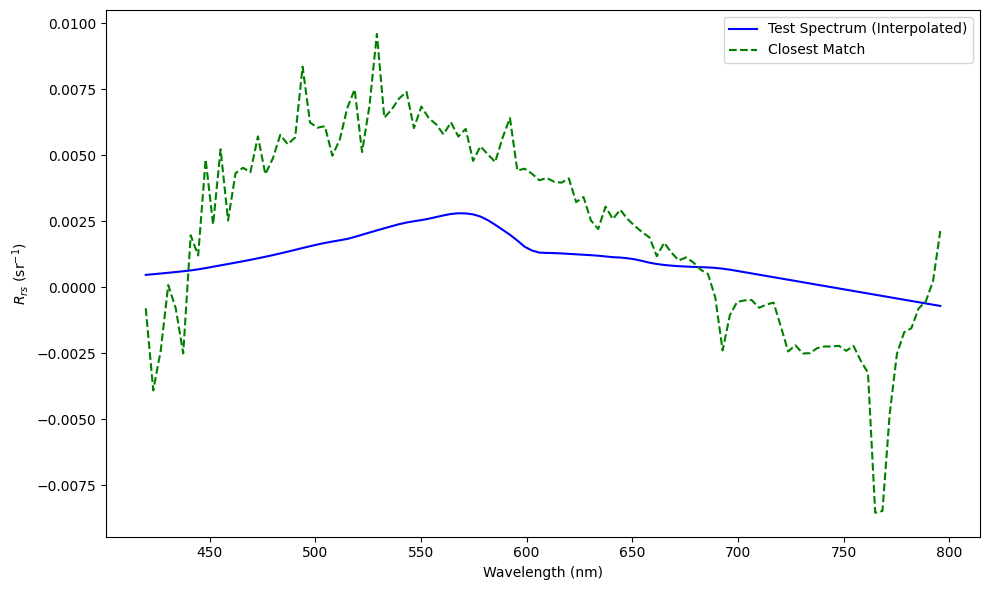

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(wl, test_RRS_interp, label='Test Spectrum (Interpolated)', color='blue')
plt.plot(wl, closest_spectrum, label='Closest Match', color='green', linestyle='--')

plt.xlabel("Wavelength (nm)")
plt.ylabel(r"$R_{rs}$ (sr$^{-1}$)")
plt.legend()
plt.tight_layout()
plt.show()


## EnMap

[0.008  0.0049 0.0041 0.0068 0.0071 0.006  0.0055 0.0057 0.0054 0.006
 0.0063 0.0055 0.0054 0.0059 0.0069 0.007  0.0067 0.0072 0.007  0.0064
 0.006  0.0062 0.0063 0.006  0.0061 0.0068 0.0069 0.0061 0.0061 0.0062
 0.0061 0.006  0.0055 0.0062 0.0072 0.0078 0.006  0.0048 0.0049 0.0046
 0.0047 0.0047 0.0048 0.0053 0.006  0.0055 0.0047 0.0046 0.0043 0.0041
 0.0042 0.0052 0.005  0.0042 0.0043 0.0063 0.0051 0.0028 0.0011 0.001
 0.0002 0.     0.0006 0.0006 0.0009 0.001 ]
(55, 66)


/tmp/ipykernel_1895606/866927493.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


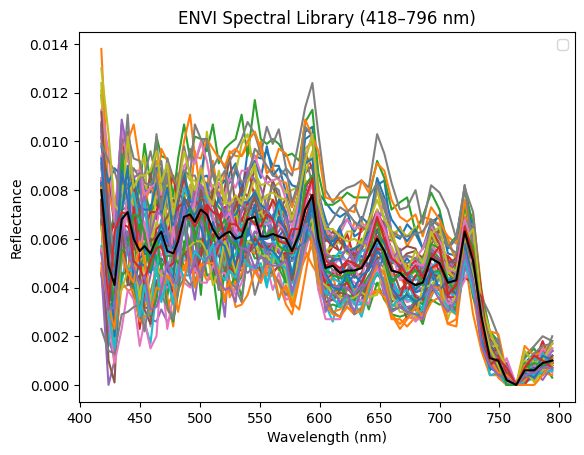

In [ ]:
import spectral
import matplotlib.pyplot as plt
import numpy as np


spectra = spectral.io.envi.open('../../EnMap/data/23April2025.hdr', '../../EnMap/data/23April2025.sli')
data = spectra.spectra  # (n_spectra x n_bands)


header = spectral.envi.read_envi_header('../../EnMap/data/23April2025.hdr')
wavelengths_um = header['wavelength']
wavelengths_nm = [float(w) * 1000 for w in wavelengths_um]


min_nm, max_nm = 418, 796
mask = [(w >= min_nm and w <= max_nm) for w in wavelengths_nm]


filtered_wavelengths = [w for w, m in zip(wavelengths_nm, mask) if m]
filtered_data = data[:, mask]  


median_data_EnMap = np.median(np.array(filtered_data), axis = 0)
print(median_data_EnMap)
print(filtered_data.shape)

# Plotting
for i in range(filtered_data.shape[0]):
    plt.plot(filtered_wavelengths, filtered_data[i], )#label=f"Spectrum {i+1}")
plt.plot(filtered_wavelengths, median_data_EnMap, color = "black")

plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('ENVI Spectral Library (418–796 nm)')
plt.legend()
plt.show()


[0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.0002 0.     0.0002 0.0012 0.0021 0.002  0.0022 0.0026 0.0034 0.0033
 0.0036 0.0043 0.0042 0.0043 0.005  0.0057 0.006  0.0061 0.0064 0.0066
 0.0066 0.0062 0.0058 0.0067 0.0076 0.0081 0.0068 0.0058 0.0057 0.0056
 0.0058 0.0057 0.0057 0.0059 0.0069 0.0063 0.0055 0.0054 0.0054 0.0055
 0.0053 0.0058 0.0062 0.0051 0.0052 0.0065 0.0051 0.0037 0.0022 0.002
 0.0015 0.     0.0019 0.002  0.0023 0.0025]
(35, 66)


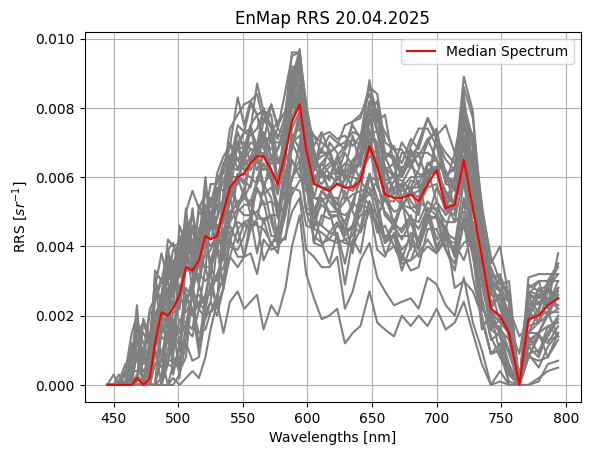

In [ ]:
import spectral
import matplotlib.pyplot as plt
import numpy as np


spectra = spectral.io.envi.open('../../EnMap/data/2025_04_20_forsterkning.hdr', '../../EnMap/data/2025_04_20_forsterkning.sli') 
data = spectra.spectra  


header = spectral.envi.read_envi_header('../../EnMap/data/2025_04_20_forsterkning.hdr')
wavelengths_um = header['wavelength']
wavelengths_nm = [float(w) * 1000 for w in wavelengths_um]


min_nm, max_nm = 418, 796
mask = [(w >= min_nm and w <= max_nm) for w in wavelengths_nm]


filtered_wavelengths = [w for w, m in zip(wavelengths_nm, mask) if m]
filtered_data = data[:, mask]  


median_data_backup = np.median(np.array(filtered_data), axis = 0)
print(median_data_backup)
print(filtered_data.shape)

# Plotting
for i in range(filtered_data.shape[0]):
    plt.plot(filtered_wavelengths[5:], filtered_data[i][5:], color = "gray")
plt.plot(filtered_wavelengths[5:], median_data_backup[5:], color = "red", label='Median Spectrum')

plt.xlabel("Wavelengths [nm]")
plt.ylabel("RRS [$sr^{-1}$]")
plt.title('EnMap RRS 20.04.2025')
plt.grid()
plt.legend()
#plt.savefig('../plots/AllEnMAp_forsterkning_20042025.pdf', dpi=300, bbox_inches='tight')
plt.show()

## Optimalisering EnMap vs H2 kl 12

In [26]:
print(RRS_AC_H2_250511_A1_12.shape)
filtered_data = np.array(filtered_data)
print(filtered_data.shape)

(1265, 109)
(35, 66)


In [ ]:
import numpy as np
from scipy.interpolate import interp1d


wl = np.array(wl)
filtered_wavelengths = np.array(filtered_wavelengths)


wl_min = max(wl.min(), filtered_wavelengths.min())
wl_max = min(wl.max(), filtered_wavelengths.max())
common_mask = (wl >= wl_min) & (wl <= wl_max)
wl_common = wl[common_mask]


RRS_trimmed = RRS_AC_H2_250511_A1_12[:, common_mask]


closest_indices = []


for i in range(filtered_data.shape[0]):
    f_interp_func = interp1d(filtered_wavelengths, filtered_data[i], kind='linear', bounds_error=False, fill_value='extrapolate')
    

    interp_spec = f_interp_func(wl_common)


    distances = np.linalg.norm(RRS_trimmed - interp_spec, axis=1)


    closest_index = np.argmin(distances)
    closest_indices.append(closest_index)


closest_indices = np.array(closest_indices)

print("Closest matches found for all 55 spectra.")
print("Indices in RRS_AC_H2_250511_A1_12:", closest_indices)


Closest matches found for all 55 spectra.
Indices in RRS_AC_H2_250511_A1_12: [  17   17   96   17   17   96 1033   17  203  105   17 1033   17   17
   17   17  288 1033  105 1033   96   17 1033  203   17  203   96  203
 1033  203 1033  203   17 1033   17]


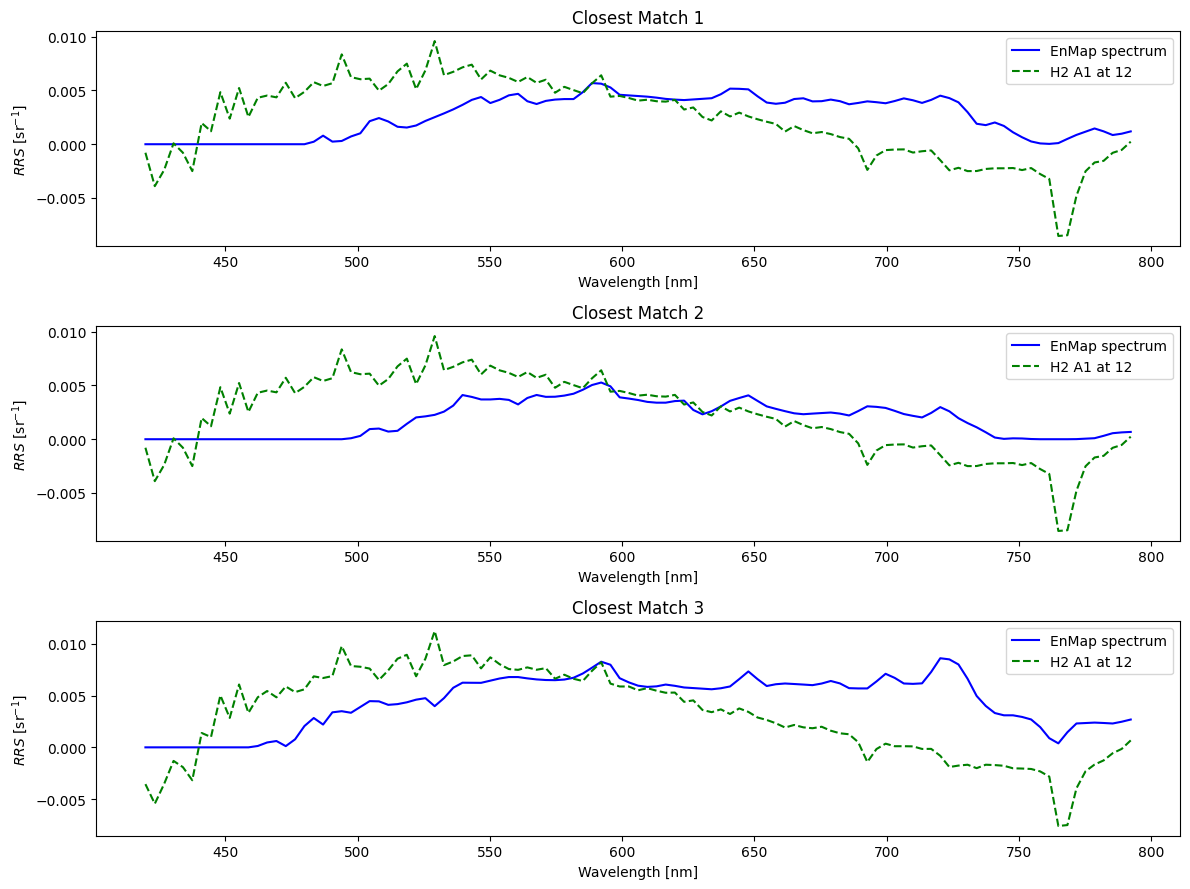

In [ ]:
import matplotlib.pyplot as plt


N = 3

plt.figure(figsize=(12, N * 3))

for i in range(N):
    plt.subplot(N, 1, i + 1)


    interp_func = interp1d(filtered_wavelengths, filtered_data[i], kind='linear', bounds_error=False, fill_value='extrapolate')
    interp_spec = interp_func(wl_common)


    matched_spec = RRS_trimmed[closest_indices[i]]

    # Plot
    plt.plot(wl_common, interp_spec, label='EnMap spectrum', color='blue')
    plt.plot(wl_common, matched_spec, label='H2 A1 at 12', color='green', linestyle='--')

    plt.xlabel("Wavelength [nm]")
    plt.ylabel(r"$RRS$ [sr$^{-1}$]")
    #plt.title(f"Match {i + 1} - Closest Index: {closest_indices[i]}")
    plt.title(f"Closest Match {i + 1}")
    plt.legend()

plt.tight_layout()
plt.savefig('../resultater/H2Ac/H2vsEnMap_AC_closest_match.pdf', dpi=300, bbox_inches='tight')
plt.show()


## Plot

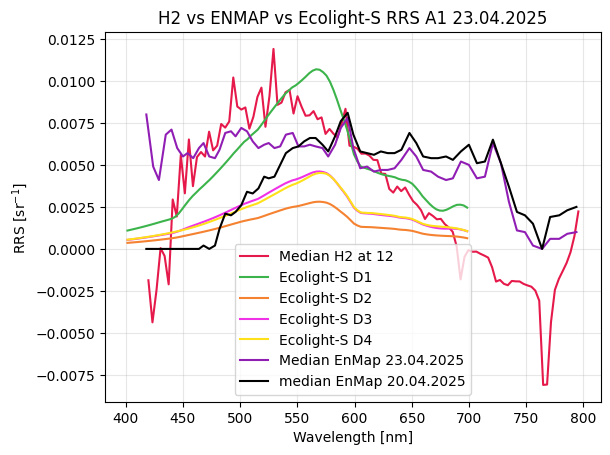

In [ ]:
#H2 kl 10
#plt.plot(wl, RRS_median_H2_AC_A1_10, color="#e6194b", linestyle= '-', label='median H2 at 10')
#plt.plot(wl, RRS_median_H2_AC_A2_10, color="#e6194b", linestyle= '-', )#label='median H2 A2 AC at 10')
#plt.plot(wl, RRS_median_H2_AC_A3_10, color="#e6194b", linestyle= '-', label='median H2 at 10')
#plt.plot(wl, RRS_median_H2_AC_A5_10, color="#e6194b", linestyle= '-', )#label='median H2 A4 AC at 10')
#plt.plot(wl, RRS_median_H2_AC_A6_10, color="#e6194b", linestyle= '-', )#label='median H2 A5 AC at 10',  )#marker="o")

#H2 kl 12
plt.plot(wl, RRS_median_H2_AC_A1_12, color="#e6194b", linestyle= '-', label='Median H2 at 12')
#plt.plot(wl, RRS_median_H2_AC_A2_12, color="#3cb44b", linestyle= '-', label='median H2 A2 at 12')
#plt.plot(wl, RRS_median_H2_AC_A3_12, color="#911eb4", linestyle= '-', label='Median H2 A3 at 12')
#plt.plot(wl, RRS_median_H2_AC_A5_12, color="#0082c8", linestyle= '-', label='Median H2 A4 at 12')
#plt.plot(wl, RRS_median_H2_AC_A6_12, color="#f58231", linestyle= '-', label='Median H2 A5 at 12',  )#marker="o")


# ECOLIGHT-S 
#plt.plot(wl_e, ecolight_median[0], color="#9467bd", linestyle= '-',  label='Ecolight-S')
#plt.plot(wl_e, ecolight_median[1], color="#9467bd", linestyle= '--', )#label='median Ecolight-S A2')
#plt.plot(wl_e, ecolight_median[2], color="#9467bd", linestyle= ':',  )#label='median Ecolight-S A3')
#plt.plot(wl_e, ecolight_median[3], color="#9467bd", linestyle= '-.', )#label='median Ecolight-S A4')
#plt.plot(wl_e, ecolight_median[4], color="#9467bd", linestyle= '-',  )#label='median Ecolight-S A5')

# ECOLIGHT-S 
plt.plot(wl_e, x_ecolight_normal[5, :], color="#3cb44b", linestyle= '-',  label='Ecolight-S D1')
#plt.plot(wl_e, x_ecolight_normal[6, :], color="#9467bd", linestyle= '--', )#label='median Ecolight-S A2')
#plt.plot(wl_e, x_ecolight_normal[7, :], color="#9467bd", linestyle= ':',  )#label='median Ecolight-S A3')
#plt.plot(wl_e, x_ecolight_normal[8, :], color="#3cb44b", linestyle= '-', label='Ecolight-S D1 norm')
#plt.plot(wl_e, x_ecolight_normal[9, :], color="#9467bd", linestyle= '-',  )#label='median Ecolight-S A5')
#
plt.plot(wl_e, x_ecolight_profile[5, :], color="#f58231", linestyle= '-',  label='Ecolight-S D2')
#plt.plot(wl_e, x_ecolight_profile[6, :], color="#f032e6", linestyle= '--', )#label='median Ecolight-S A2')
#plt.plot(wl_e, x_ecolight_profile[7, :], color="#f032e6", linestyle= ':',  )#label='median Ecolight-S A3')
#plt.plot(wl_e, x_ecolight_profile[8, :], color="#6b332b", linestyle= '-', label='Ecolight-S D2 profile')
#plt.plot(wl_e, x_ecolight_profile[9, :], color="#f032e6", linestyle= '-',  )#label='median Ecolight-S A5')

plt.plot(wl_e, x_ecolight_profile_b[5, :], color="#f032e6", linestyle= '-',  label='Ecolight-S D3')
#plt.plot(wl_e, x_ecolight_profile_b[6, :], color="#f58231", linestyle= '--', )#label='median Ecolight-S A2')
#plt.plot(wl_e, x_ecolight_profile_b[7, :], color="#f58231", linestyle= ':',  )#label='median Ecolight-S A3')
#plt.plot(wl_e, x_ecolight_profile_b[8, :], color="#f58231", linestyle= '-',  label='Ecolight-S D3 newprofile' )#label='median Ecolight-S A4')
#plt.plot(wl_e, x_ecolight_profile_b[9, :], color="#f58231", linestyle= '-',  )#label='median Ecolight-S A5')


plt.plot(wl_e, x_ecolight_profile_c[5, :], color="#ffe119", linestyle= '-',  label='Ecolight-S D4')
#plt.plot(wl_e, x_ecolight_profile_c[6, :], color="#f58231", linestyle= '--', )#label='median Ecolight-S A2')
#plt.plot(wl_e, x_ecolight_profile_c[7, :], color="#f58231", linestyle= ':',  )#label='median Ecolight-S A3')
#plt.plot(wl_e, x_ecolight_profile_c[8, :], color="#000000", linestyle= '-.',  label='Ecolight-S D4 Vp' )#label='median Ecolight-S A4')
#plt.plot(wl_e, x_ecolight_profile_c[9, :], color="#f58231", linestyle= '-',  )#label='median Ecolight-S A5')

#EnMap
plt.plot(filtered_wavelengths, median_data_EnMap, color = "#911eb4", label = "Median EnMap 23.04.2025")
plt.plot(filtered_wavelengths, median_data_backup, color = "black", label='median EnMap 20.04.2025')


plt.xlabel("Wavelength [nm]")
plt.ylabel("RRS [sr$^{-1}$] ") #Er begge water leaving radience???
plt.title("H2 vs ENMAP vs Ecolight-S RRS A1 23.04.2025") ## bruke AC som Atmosperic Correction 
plt.grid(True, alpha=0.3)
plt.legend()
plt.savefig('../resultater/medEcolight/H2vsEnMap_wBackup.pdf', dpi=300, bbox_inches='tight')
plt.show()

